# Model Evaluation Exercise

## Regression evaluation

In [1]:
# import numpy
import numpy as np

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_features=10, n_samples=1000, noise=10)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [3]:
from sklearn.linear_model import LinearRegression, Ridge

In [4]:
# creating linear regression
lr = LinearRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [5]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

_________________________
## Mean Absolute Error (MAE)


**Write the definition to the mean absolute error (MAE) below and how to interpret it?**
> MAE is the absolute difference between the target value and the value predicted by the model. The MAE is more robust to outliers and does not penalize the errors as extremely as mse. MAE is a linear score which means all the individual differences are weighted equally. It is not suitable for applications where you want to pay more attention to the outliers.
>
> The smaller the value, the better the model.

* import **mean_absolute_error** from sklearn

In [6]:
from sklearn.metrics import  mean_absolute_error

* compute MAE

In [10]:
MAE_lr = mean_absolute_error(y, y_lr)
MAE_lr

7.907052351562481

In [12]:
MAE_rr = mean_absolute_error(y, y_rr)
MAE_rr

7.906636088781526

* According to MAE, what is the better model?

> ridge regression is a better model due to smaller MAE value

____________________________________
## R2 - Coefficient of Determination

**Write the definition to the R2 score below and how to interpret it?**
> Coefficient of Determination or R² is another metric used for evaluating the performance of a regression model. The metric helps us to compare our current model with a constant baseline and tells us how much our model is better. The constant baseline is chosen by taking the mean of the data and drawing a line at the mean. R² is a scale-free score that implies it doesn't matter whether the values are too large or too small, the R² will always be less than or equal to 1.
>
> The larger the value, the better the model.

* import **r2_score** from sklearn

In [13]:
from sklearn.metrics import r2_score

* compute R2

In [14]:
r2_lr = r2_score(y, y_lr)
r2_lr

0.9971247885392417

In [15]:
r2_rr = r2_score(y, y_rr)
r2_rr

0.9971247786067803

* According to R2, what is the better model?

> linear regression is better due to larger R2 value

* (Stretch) use predictions from linear regression and compute adjusted R2

In [20]:
adjr2_lr = 1 - (1-r2_lr) * (len(X) - 1) / (len(X) - len(X[0]) - 1)
adjr2_lr

0.9970957166336728

________________________________
## Classification evaluation

In [21]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [22]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [23]:
# creating linear regression
lr = LogisticRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [24]:
# creating ridge regression
rr = RidgeClassifier(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

## Precision score

**Write the definition to the Precision score below and how to interpret it?**
> Precision is the ratio between the True Positives and all the Positives.
>
> The larger the value, the better the model.

* import **precision_score** from sklearn

In [25]:
from sklearn.metrics import precision_score

* compute precision

In [26]:
prec_lr = precision_score(y, y_lr)
prec_lr

0.8158914728682171

In [28]:
prec_rr = precision_score(y, y_rr)
prec_rr

0.8103130755064457

* print precision

> Logistic Regression is the better model due to larger precision value

## Recall score

**Write the definition to the Recall score below and how to interpret it?**
> The recall is the measure of our model correctly identifying True Positives.
>
> The larger the value, the better the model.

* import **recall_score** from sklearn

In [29]:
from sklearn.metrics import recall_score

* compute recall

In [30]:
recal_lr = recall_score(y, y_lr)
recal_lr

0.8505050505050505

In [31]:
recal_rr = recall_score(y, y_rr)
recal_rr

0.8888888888888888

* print recall

> Ridge Regression is the better model due to larger value

## ROC curve

**What is the ROC curve? How do you interpret it?**
> It is the plot between the True-Positive-Rate (y-axis) and False-Positive-Rate (x-axis).
>
> * At the lowest point, i.e. at (0, 0)- the threshold is set at 1.0. This means our model classifies all patients as not having a heart disease.
> * At the highest point i.e. at (1, 1), the threshold is set at 0.0. This means our model classifies all patients as having a heart disease.
> * The rest of the curve is the values of FPR and TPR for the threshold values between 0 and 1.
> * At some threshold value, we observe that for FPR close to 0, we are achieving a TPR of close to 1. This is when the model will predict the patients having heart disease almost perfectly.

* import **roc_curve** from sklearn

In [32]:
from sklearn.metrics import roc_curve

* compute and store ROC curve values in fpr, tpr, thresholds variables

In [33]:
fpr, tpr, thresholds = roc_curve(y, y_lr)

* import matplotlib 

In [34]:
import matplotlib.pyplot as plt

* plot ROC

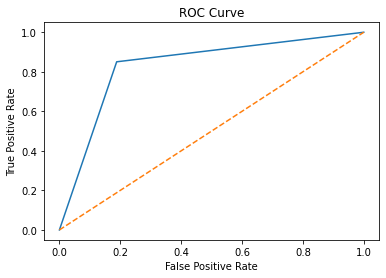

In [60]:
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers too...*

* import **log_loss** from sklearn

In [61]:
from sklearn.metrics import log_loss

* compute log_loss

In [62]:
ll_lr = log_loss(y, y_lr)
ll_lr

5.837129172495773

In [63]:
ll_rr = log_loss(y, y_rr)
ll_rr

5.4572090289311985

* print log_loss

#### Q: According to metrics above, which one is the better model?